# Machine Learning Model
In this part of Machine Learning, we will use adult data set which is available from this UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/datasets/Adult). The data is already being transformed and cleaned. However, we need to perform further cleanings in order to demonstrate the results that we have obtained.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing the adult data
df = pd.read_csv ("adult.csv")

# 1. Adult Data Set

### Description of the data

   Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted to          Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
 

### What I got to know about the features in dataset 
<ul>
<li>age: continuous.</li>
<li>workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</li>
<li>fnlwgt: continuous.</li>
<li>education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.</li>
<li>education-num: continuous.</li>
<li>marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</li>
<li>occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.</li>
<li>relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.</li>
<li>race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.</li>
<li>sex: Female, Male.</li>
<li>capital-gain: continuous.</li>
<li>capital-loss: continuous.</li>
<li>hours-per-week: continuous.</li>
<li>native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.</li>

In [2]:
# head of dataframe
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# shape of dataframe
print(df.shape)

(48842, 15)


In [4]:
# whole Statistics of of adult dataset
df.describe( )

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Displaying a breif overview of all the columns data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# 2. Discover and Handle missing values.

In [6]:
# identifying the missing values and replacing them from ( ' - ' , ' ? ' ) to NAN in new_df
missing_val = ['n/a', '-', '?']
df= pd.read_csv('adult.csv', na_values = missing_val)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
# Identifying missing values in columns
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
# Rows with atleast one missing values
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4         True
         ...  
48837    False
48838    False
48839    False
48840    False
48841    False
Length: 48842, dtype: bool

In [9]:
# Remove all the rows which cantain missing values
new_df=df.dropna()
new_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 3. Data Preparation


In [10]:
# Remove unnecessary columns i.e."fnlwgt"
new_df = new_df.drop(['fnlwgt'], axis = 1)
new_df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
# Displaying a breif overview of all the columns data type and missing values in new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education        45222 non-null  object
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


# 4.1. Standardizing numerical data

In [12]:
# making num dataframe for Standardizing numerical columns
num = new_df.select_dtypes(include=['int64'])
num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [13]:
# using sklearn.preprocessing.StandardScaler to Standardizing num dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(num),columns = num.columns)
df_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


# 4.2. Encoding categorical features

In [14]:
# making cat dataframe for Standardizing categorical columns
cat = new_df.select_dtypes(include=['object'])
cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [15]:
# Extracting categorical features with multiple categories
dumm_df = cat[['workclass','education','marital-status','occupation','relationship','race','native-country']]
dumm_df.head()

,workclass,education,marital-status,occupation,relationship,race,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States
5,Private,10th,Never-married,Other-service,Not-in-family,White,United-States


In [16]:
# making dummy dataframe for dumm_df
dumm_df = pd.get_dummies(dumm_df)
dumm_df.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# concatenation of both cat and dumm_df
df_cat = pd.concat([cat,dumm_df],axis=1)
df_cat.drop(['workclass','education','marital-status','occupation','relationship','race','native-country'],axis=1,inplace=True)
df_cat.head()

,gender,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,Male,<=50K,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Male,<=50K,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Male,>50K,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Male,>50K,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,Male,<=50K,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Encoding the gender column
df_cat['gender'].replace({'Female':1,'Male':0},inplace=True)
df_cat.head()

,gender,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,<=50K,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,<=50K,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,>50K,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,>50K,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,<=50K,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# Encoding the income column
df_cat['income'].replace({'<=50K':1,'>50K':0},inplace=True)
df_cat.head()

,gender,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# concatenation of both df_num and df_cat
adult_df = pd.concat([df_num,df_cat], axis=1)
adult_df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,gender,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Remove all the rows which cantain missing values
adult_df=adult_df.dropna()
adult_df

,age,educational-num,capital-gain,capital-loss,hours-per-week,gender,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.849945,1.912190,0.266650,-0.21878,-0.744377,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,-1.251951,-0.046403,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45217,-0.873671,0.737034,-0.146733,-0.21878,-0.244684,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45219,1.471665,-0.438122,-0.146733,-0.21878,-0.078120,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45220,-1.251951,-0.438122,-0.146733,-0.21878,-1.743763,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
# Determining the X and Y
y = adult_df.pop('income')
x = adult_df

# 5. Test Train Split

In [23]:
# spliting into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=100)

In [24]:
# Shape of train and test 
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(29318, 102) (29318,)
(12565, 102) (12565,)


#  6. Using Logistic Regression algorithm to Create a model

## 6.1. Training

In [25]:
# Training the model using LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\Vishal Chitara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 6.2. Prediction

In [26]:
# Predicting the above model
y_pred = classifier.predict(x_test)
pred_prod = classifier.predict_proba(x_test)
np.around(pred_prod,decimals = 2)

array([[0.01, 0.99],
       [0.06, 0.94],
       [0.34, 0.66],
       ...,
       [0.06, 0.94],
       [0.73, 0.27],
       [0.41, 0.59]])

## 6.3. Measuring Performance

In [27]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.833267011539992

## 6.4. Confusion Metrics

In [28]:
# print the confusion matrix
con_metrics = metrics.confusion_matrix(y_test,y_pred)
con_metrics

array([[1701, 1387],
       [ 708, 8769]], dtype=int64)

## 6.5. Classification Report

In [29]:
# Checking Precision, Recall and F1 Score
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.55      0.62      3088
         1.0       0.86      0.93      0.89      9477

    accuracy                           0.83     12565
   macro avg       0.78      0.74      0.76     12565
weighted avg       0.82      0.83      0.83     12565



# 7. Using RFE to extract the best features and building the model

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

## 7.1.(a) Training

In [31]:
# Feature extraction
model = LogisticRegression(max_iter=250)
rfe = RFE(model, 32)
rfe = rfe.fit(x_train,y_train)
rfe

C:\Users\Vishal Chitara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=250,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=32, step=1, verbose=0)

In [32]:
# Making a temporary dataframe with 32 best features
temp_df = pd.DataFrame({'Columns' : x_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})
temp_df

,Columns,Included,Ranking
0,age,False,66
1,educational-num,False,67
2,capital-gain,False,65
3,capital-loss,False,64
4,hours-per-week,False,70
...,...,...,...
97,native-country_Thailand,False,10
98,native-country_Trinadad&Tobago,False,8
99,native-country_United-States,False,30
100,native-country_Vietnam,False,31


In [33]:
imp_col = x_train.columns[rfe.support_]
imp_col

Index(['gender', 'education_10th', 'education_11th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Bachelors', 'education_Doctorate', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Wife', 'native-country_Columbia',
       'native-country_Dominican-Republic', 'native-country_Ecuador',
       'native-country_Greece', 'native-country_Guatemala',
       'native-country_Mexico', 'native-country_Peru',
       'native-country_Scotland', 'native-country_Yugoslavia'],
      dtype='object')

In [34]:
x_train_new = x_train[imp_col]
x_train_new

,gender,education_10th,education_11th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Bachelors,education_Doctorate,education_Masters,...,relationship_Wife,native-country_Columbia,native-country_Dominican-Republic,native-country_Ecuador,native-country_Greece,native-country_Guatemala,native-country_Mexico,native-country_Peru,native-country_Scotland,native-country_Yugoslavia
35381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24293,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17637,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13082,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 7.1.(b) Training

In [35]:
# Training the model with best 32 features
new_lr = LogisticRegression(max_iter=250)
new_lr.fit(x_train_new,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# 7.2. Prediction

In [71]:
# Predicting the above model
y_train_pred_new = new_lr .predict(x_train_new)
y_train_pred_new

array([1., 0., 1., ..., 1., 1., 1.])

# 7.3. Measuring Performance

In [37]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.833267011539992

# 7.4. Confusion Metrics

In [70]:
# print the confusion matrix
con_metrics = metrics.confusion_matrix(y_test,y_pred)
con_metrics

array([[1699, 1389],
       [1612, 7865]], dtype=int64)

# 7.5. Classification Report

In [72]:
# Checking Precision, Recall and F1 Score
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.55      0.53      3088
         1.0       0.85      0.83      0.84      9477

    accuracy                           0.76     12565
   macro avg       0.68      0.69      0.69     12565
weighted avg       0.77      0.76      0.76     12565



# 8. Using PCA to extract the best features and building the model

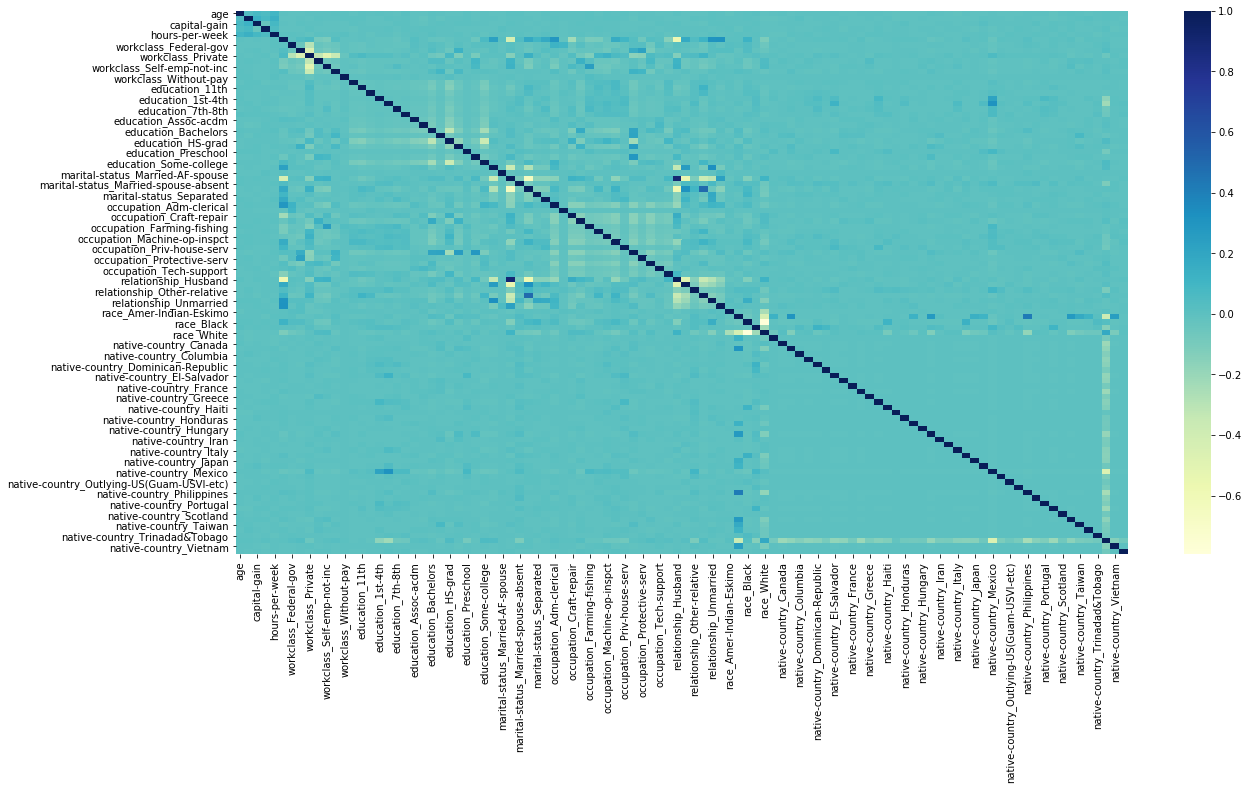

In [38]:
# Heatmap for x_train
plt.figure(figsize=(20,10))
sns.heatmap(x_train.corr(),cmap="YlGnBu")

In [39]:
# shape of x_train
x_train.shape

(29318, 102)

## 8.1.(a) Training

In [40]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

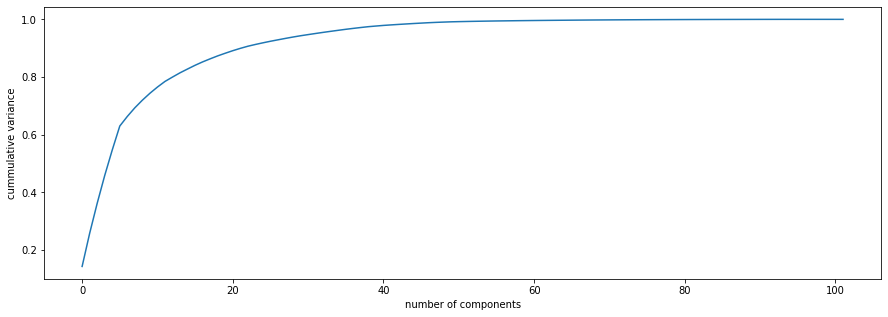

In [41]:
plt.figure(figsize =(15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cummulative variance')
plt.show()

In [42]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14356866, 0.25830474, 0.36237782, 0.45888794, 0.54728769,
       0.63026333, 0.66350851, 0.69350286, 0.71990184, 0.74384118,
       0.76536056, 0.784856  , 0.80005817, 0.81478823, 0.82796335,
       0.84088151, 0.85260851, 0.86324455, 0.87342111, 0.88260572,
       0.89141202, 0.89947043, 0.9068202 , 0.91298186, 0.91866345,
       0.92407614, 0.92909142, 0.93403996, 0.93877961, 0.94317364,
       0.94716882, 0.95107821, 0.95488867, 0.95851674, 0.96205865,
       0.96553116, 0.96871243, 0.97174757, 0.97461752, 0.97682957,
       0.97897944, 0.98076082, 0.98244248, 0.98402141, 0.98557627,
       0.98699206, 0.98838548, 0.98956173, 0.99052875, 0.99146958,
       0.99209242, 0.9926257 , 0.99315188, 0.99359504, 0.99402886,
       0.99441398, 0.99476022, 0.99510181, 0.99541755, 0.99571083,
       0.9959956 , 0.99626591, 0.99650556, 0.99674194, 0.9969702 ,
       0.99719013, 0.99740702, 0.99762031, 0.99781458, 0.99798446,
       0.99814624, 0.99829768, 0.99844065, 0.99857297, 0.99869

In [69]:
# Training the model with best 48 features
pca_final = PCA(n_components = 48,random_state = 0)
x_train_pca = pca_final.fit_transform(x_train)
x_train_pca

array([[-2.23133976e+00,  2.32490685e-01, -4.42589661e-01, ...,
        -1.47130501e-02, -2.21076611e-02,  9.34202501e-03],
       [ 2.36387364e+00, -3.69331750e+00, -6.90098145e-01, ...,
         6.76579223e-03,  6.88502610e-03,  1.52759488e-02],
       [ 1.04628610e+00,  4.53259856e-01,  5.68499005e-02, ...,
        -8.57679117e-03, -1.13522348e-02, -8.29034086e-03],
       ...,
       [ 1.04810736e+00,  3.19625197e-01,  2.95789688e+00, ...,
        -1.16505306e-02,  2.68051807e-03, -4.61771304e-02],
       [-8.60433253e-01,  1.57093381e-01, -1.18770106e-01, ...,
         1.20771335e-02, -2.93057603e-03,  1.75925324e-02],
       [-4.94873979e-01,  1.40179432e-01, -5.77357928e-01, ...,
         1.02060433e-02, -1.13615714e-02,  2.13769722e-02]])

In [44]:
# shape of x_train_pca
x_train_pca.shape

(29318, 48)

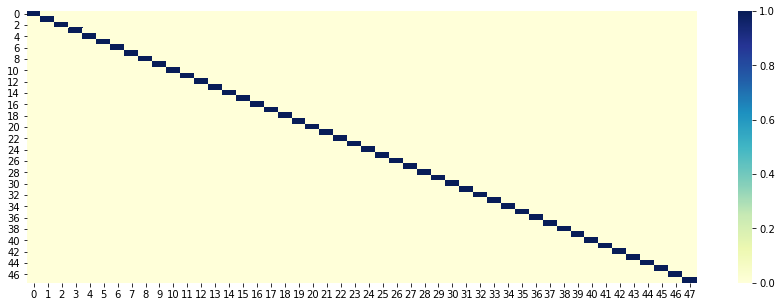

In [45]:
# heatmap of corrmat
corrmat = np.corrcoef(x_train_pca.T)
plt.figure(figsize=(15,5))
sns.heatmap(corrmat,cmap="YlGnBu")

In [46]:
x_test_pca = pca_final.transform(x_test)

## 8.1.(b) Training

In [47]:
# Building the model using PCA with only 47 features
from sklearn.linear_model import LogisticRegression
regressor_pca = LogisticRegression()
regressor_pca.fit(x_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 8.2. Prediction

In [48]:
# print cofficient and intercept 
print(regressor_pca.coef_)
print(regressor_pca.intercept_)

[[-0.04219794 -0.00912983 -0.05995423 -0.08413366 -0.04075483  1.81390872
  -1.17702169 -0.67995919  0.55818848  1.00846843  0.55313314  0.02809942
   0.8680408  -0.13498268 -0.01600147 -0.48364378  0.58038408  1.44138065
  -0.4900904   0.03803235 -0.38427333 -0.39208417  0.87032647 -0.1646095
  -0.51050301  0.58801877  0.92027202  0.56185334 -1.2246496  -0.38650228
  -0.60628595 -1.04422091  0.40931222  0.5994138  -0.01602647 -0.67070918
   0.32295568  0.63367649 -0.22740297 -0.86905297 -0.30940375 -0.21327136
   1.61678021  0.09219014  0.78098304 -0.71580895 -0.28946308 -2.87802968]]
[1.94230158]


In [49]:
# Actual and predicted of PCA model
y_test_pred_pca = regressor_pca.predict(x_test_pca)
temp_df = pd.DataFrame({'Actual': y_test,'predicted':y_test_pred_pca})
temp_df.head()

,Actual,predicted
16122,1.0,1.0
43588,1.0,1.0
3686,0.0,1.0
5977,1.0,1.0
8654,0.0,0.0


In [50]:
# errors in PCA model
from sklearn import metrics
print('Mean Sbsolute Eerror:',metrics.mean_absolute_error(y_test,y_test_pred_pca))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_test_pred_pca))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred_pca)))

Mean Sbsolute Eerror: 0.16752884998010345
Mean Squared Error: 0.16752884998010345
Root Mean Squared Error: 0.40930288293646727


## 8.3. Measuring Performance

In [51]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred_pca)

0.8324711500198966

## 8.4. Confusion Metrics

In [52]:
# print the confusion matrix
con_metrics = metrics.confusion_matrix(y_test,y_test_pred_pca)
con_metrics

array([[1691, 1397],
       [ 708, 8769]], dtype=int64)

## 8.5. Classification Report

In [53]:
# Checking Precision, Recall and F1 Score
print(metrics.classification_report(y_test,y_test_pred_pca))

              precision    recall  f1-score   support

         0.0       0.70      0.55      0.62      3088
         1.0       0.86      0.93      0.89      9477

    accuracy                           0.83     12565
   macro avg       0.78      0.74      0.75     12565
weighted avg       0.82      0.83      0.82     12565



# 9. Using SVM to building the model

##  9.1. Training

In [54]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 9.2. Prediction

In [74]:
y_pred = classifier.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

## 9.3. Measuring Performance

In [56]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8286510147234382

## 9.4. Confusion Metrics

In [57]:
# print the confusion matrix
con_metrics = metrics.confusion_matrix(y_test,y_pred)
con_metrics

array([[1604, 1484],
       [ 669, 8808]], dtype=int64)

## 9.5. Classification Report

In [58]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.52      0.60      3088
         1.0       0.86      0.93      0.89      9477

    accuracy                           0.83     12565
   macro avg       0.78      0.72      0.74     12565
weighted avg       0.82      0.83      0.82     12565



#  10. Using KNN to building the model

## 10.1. Training

In [59]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## 10.2. Prediction

In [75]:
y_pred = classifier.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

## 10.3. Measuring Performance

In [61]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8046159968165539

## 10.4. Confusion Metrics

In [62]:
# print the confusion matrix
con_metrics = metrics.confusion_matrix(y_test,y_pred)
con_metrics

array([[1711, 1377],
       [1078, 8399]], dtype=int64)

## 10.5. Classification Report

In [63]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.55      0.58      3088
         1.0       0.86      0.89      0.87      9477

    accuracy                           0.80     12565
   macro avg       0.74      0.72      0.73     12565
weighted avg       0.80      0.80      0.80     12565



# 11. Using Decision Trees to building the model

## 11.1. Training

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 11.2. Prediction

In [73]:
y_pred = classifier.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

## 11.3 Measuring Performance

In [66]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7611619578193395

## 11.4. Confusion Metrics

In [67]:
# print the confusion matrix
con_metrics = metrics.confusion_matrix(y_test,y_pred)
con_metrics

array([[1699, 1389],
       [1612, 7865]], dtype=int64)

## 11.5. Classification Report

In [68]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.51      0.55      0.53      3088
         1.0       0.85      0.83      0.84      9477

    accuracy                           0.76     12565
   macro avg       0.68      0.69      0.69     12565
weighted avg       0.77      0.76      0.76     12565



# 12. Conclusion :-
<li> As we made multiple machine learning Model on the adult dataset to predict the target variable i.e."income". Which gives their own accuracy_score to predict the target variable, and there accuracy_score are as follows:-</li>

1. Using Logistic Regression :- 83.32%
2. Using RFE :- 83.32%
3. Using PCA :- 83.24%
4. Using SVM :- 82.86%
5. Using KNN :- 80.46%
6. Using Decision Trees :- 76.11%